In [1]:
import json
import numpy as np
import matplotlib
from matplotlib import style
style.use('ggplot')
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import os
os.environ['pandeia_refdata'] = "/home/maryhallow/Desktop/python/Reionizatoin/JWSTUserTraining2016/pandeia_data"
os.environ['PYSYN_CDBS'] = "/home/maryhallow/Desktop/python/Reionizatoin/JWSTUserTraining2016/cdbs.23.1.rc3"

from pandeia.engine.perform_calculation import perform_calculation
from pandeia.engine.calc_utils import build_default_calc

In [11]:
calc_input = build_default_calc('jwst', 'nircam', 'sw_imaging')

#The 0th index is taken to be wavelength in units of 'mJy'.
#The 1st index is taken to be the flux in units of 'microns'.
spec = [[1,1.5,2,2.5,3],[0,1e-4,2e-4,1e-4,0]]
    
calc_input['scene'][0]['spectrum']['sed'] = {"sed_type": "input", "spectrum": spec}
calc_input['scene'][0]['spectrum']['normalization']['type'] = 'none'
calc_input['configuration']['max_scene_size'] = 30

calc_input['scene'][0]['position']['x_offset'] = 2.5

#calc_input['scene'][0]['spectrum']['normalization']['norm_flux'] = 5e-3  # mJy (flat spectrum)
#calc_input['scene'][0]['spectrum']['normalization']['norm_wave'] = 1.5   # microns

calc_input['background'] = 'low'

calc_input['configuration']['instrument']['filter'] = 'f150w'
calc_input['configuration']['detector']['nexp'] = 1

calc_input['strategy']['aperture_size'] = 0.1
calc_input['strategy']['sky_annulus'] = [0.22, 0.4]


source2 = {
           'id': 50,
           'target': True,
           'position': {
                     'ang_unit': 'arcsec',
                     'x_offset': 0.0,
                     'y_offset': 0.0,
                     },
           'shape': {
                     'pa': 0.0,
                     'major': 0.0,
                     'minor': 0.0
                     },
           'spectrum': {
                        'sed': {
                                 "sed_type": "input",
                                 "spectrum":  spec
                               },
                        'normalization': {
                                           'type': 'none'
                                         }
                        }
          }

calc_input['scene'].append(source2)

report = perform_calculation(calc_input, dict_report=False, webapp=True)
report_dict = report.as_dict()
report_fits = report.as_fits()

print(report_dict['scalar'])

/home/maryhallow/anaconda3/envs/jwst-workshop/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


{'extracted_flux': 3.112561634895356, 'background_total': 5.902553926943515, 'on_source_time': 1954.68, 'y_offset': 0.0, 'aperture_size': 0.1, 'sn': 41.46884415500242, 'filter': 'f150w', 'contamination': 0.004124694646356774, 'reference_wavelength': 1.500002982356477, 'background': 0.17430899530463462, 'extraction_area': 30.679615757712813, 'disperser': None, 'cr_ramp_rate': 0.1551109231922884, 'background_sky': 5.878207694361219, 'x_offset': 0.0, 'all_dithers_time': 1954.68, 'background_area': 342.38451185607505, 'extracted_noise': 0.0750578343409141}


(163, 163)


<IPython.core.display.Javascript object>


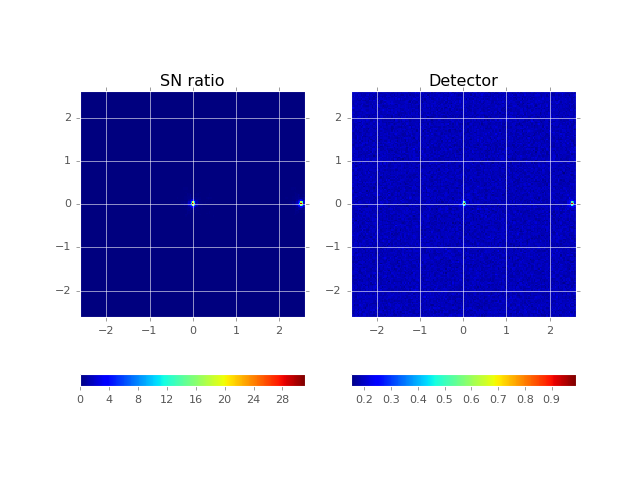

In [12]:
plt.figure(1)

t = report_dict['transform']
extent = [t['x_min'], t['x_max'], t['y_min'], t['y_max']]

print(np.shape(report_dict['2d']['snr']))

plt.subplot(1,2,1)
plt.title('SN ratio')
plt.imshow(report_dict['2d']['snr'], interpolation='nearest', extent=extent)
plt.colorbar(orientation='horizontal')

plt.subplot(1,2,2)
plt.title('Detector')
plt.imshow(report_dict['2d']['detector'], interpolation='nearest', extent=extent)
plt.colorbar(orientation='horizontal')


plt.show()

In [13]:
calc_input

{'background': 'low',
 'calculation': {'effects': {'background': True,
   'ipc': True,
   'saturation': True},
  'noise': {'crs': True,
   'darkcurrent': True,
   'ffnoise': True,
   'readnoise': True,
   'rn_correlation': True}},
 'configuration': {'detector': {'nexp': 1,
   'ngroup': 10,
   'nint': 1,
   'readmode': 'deep2',
   'subarray': 'full'},
  'dynamic_scene': True,
  'instrument': {'aperture': 'sw',
   'disperser': None,
   'filter': 'f150w',
   'instrument': 'nircam',
   'mode': 'sw_imaging'},
  'max_scene_size': 30,
  'meta': {'author': {'2016-07-21': 'T. E. Pickering'},
   'history': {'2016-07-21': 'Create initial template from pandeia config file'},
   'litref': {'2016-07-21': 'pandeia_data master'},
   'pedigree': {'2016-07-21': 'pandeia_data master'}},
  'scene_size': 2.0},
 'scene': [{'position': {'orientation': 0.0,
    'position_parameters': ['x_offset', 'y_offset', 'orientation'],
    'x_offset': 2.5,
    'y_offset': 0.0},
   'shape': {'geometry': 'point', 'shape_pa

In [222]:
calc_input2 = build_default_calc('jwst', 'nircam', 'sw_imaging')
calc_input2['scene'][0]['spectrum']['normalization']['norm_flux'] = 0e0  # mJy (flat spectrum)

report2 = perform_calculation(calc_input2, dict_report=False, webapp=True)
report2_dict = report2.as_dict()
report2_fits = report2.as_fits()

print(report2_dict['scalar'])

/home/maryhallow/anaconda3/envs/jwst-workshop/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


{'background_sky': 2.8333251966212747, 'all_dithers_time': 1954.68, 'extracted_flux': 0.0, 'extracted_noise': nan, 'extraction_area': 19.634954084936201, 'cr_ramp_rate': 0.1551109231922884, 'x_offset': 0.0, 'contamination': 0.0, 'aperture_size': 0.08, 'filter': 'f070w', 'y_offset': 0.0, 'on_source_time': 1954.68, 'reference_wavelength': 0.6812228509295932, 'background_area': 137.44467859455344, 'sn': 0.0, 'background': 0.32204326294765495, 'background_total': 2.8333251966212747, 'disperser': None}


<IPython.core.display.Javascript object>


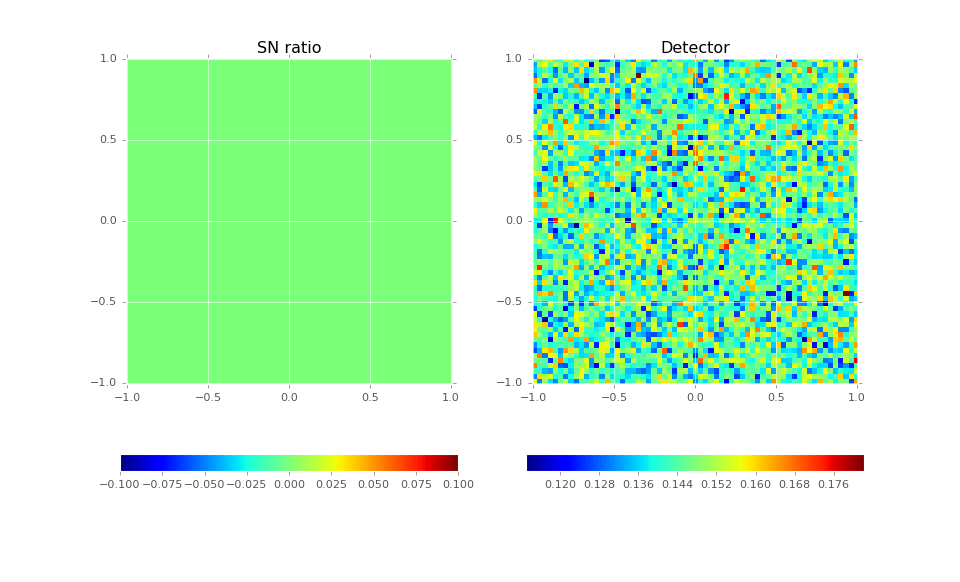

In [223]:
plt.figure(2)

t = report2_dict['transform']
extent = [t['x_min'], t['x_max'], t['y_min'], t['y_max']]

plt.subplot(1,2,1)
plt.title('SN ratio')
plt.imshow(report2_dict['2d']['snr'], interpolation='nearest', extent=extent)
plt.colorbar(orientation='horizontal')

plt.subplot(1,2,2)
plt.title('Detector')
plt.imshow(report2_dict['2d']['detector'], interpolation='nearest', extent=extent)
plt.colorbar(orientation='horizontal')


plt.show()